In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
# Read in data
df = pd.read_csv('Reviews.csv')
print(df.shape)
#df = df.head(500)
#print(df.shape)

(568454, 10)


In [3]:
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [6]:
df['Score'].value_counts().sort_index()

1     52268
2     29769
3     42640
4     80655
5    363122
Name: Score, dtype: int64

In [18]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Length of review,Proper grammar
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,48,False
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31,False
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,94,True
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,41,False
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,27,True
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,26,False
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,46,True
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",66,True
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,35,False


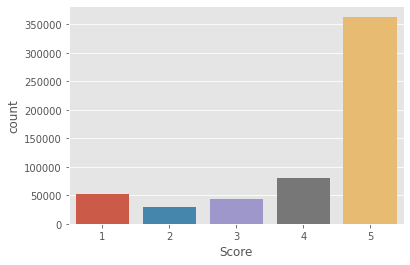

In [5]:
sns.countplot(x='Score', data=df);

In [7]:
df['Length of review']=df['Text'].apply(lambda x : len(x.split()))

In [15]:
df['Proper grammar']=df['Text'].apply(lambda x : (',' in x))

In [22]:
df[['Score','Length of review','Proper grammar']]

,Score,Length of review,Proper grammar
0,5,48,False
1,1,31,False
2,4,94,True
3,2,41,False
4,5,27,True
...,...,...,...
568449,5,26,False
568450,2,46,True
568451,5,66,True
568452,5,35,False


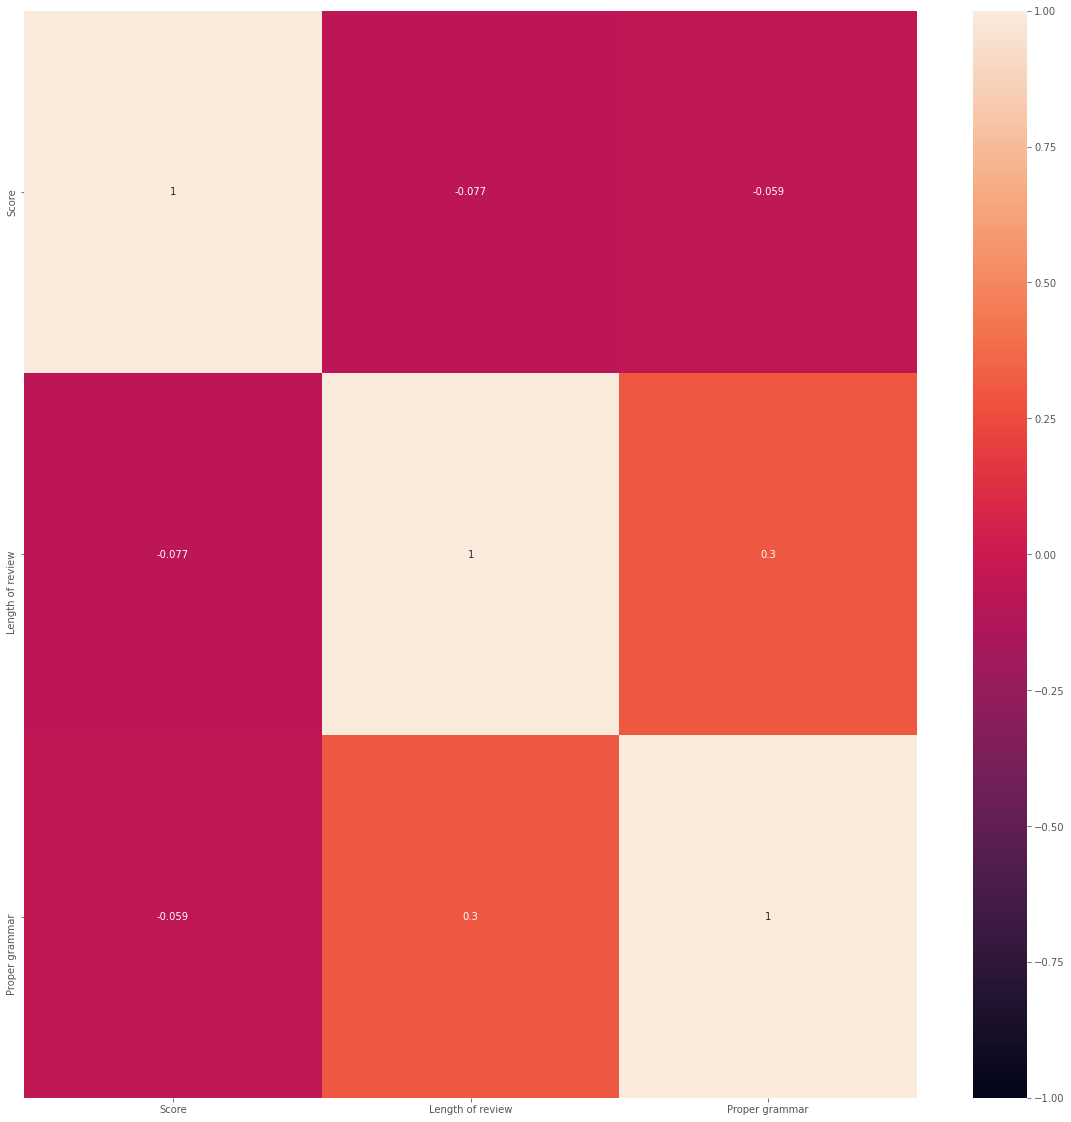

In [23]:
plt.figure(figsize=(20, 20))
#mask = np.triu(np.ones_like(df.iloc[:,1:-2].corr()))
 
sns.heatmap(df[['Score','Length of review','Proper grammar']].corr(),vmin=-1, vmax=1, annot=True);

In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [27]:
df=df.sample(1000)
siascore = {}
for i, row in tqdm(df.iterrows(), total=len(df.Text)):
    text = row['Text']
    index = row['Id']
    siascore[index] = sia.polarity_scores(text)

In [80]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,Proper grammar,neg,neu,pos,compound,1,2,3,4,5
0,502751,B001J5WTC2,A38XPXH1KQDJ65,Tina,2,3,5,1297036800,Absolutely awesome!,"I love pasta, but it does not love me. I just...",...,True,0.078,0.690,0.232,0.9808,False,False,False,False,True
1,475898,B000E1FY7Y,A2G01H4K9TCL6F,J. Duncan,3,3,5,1199404800,MADE MOMMY AND BABY VERY HAPPY!!,I breastfed my daughter for 2 weeks and then b...,...,True,0.087,0.811,0.103,0.8094,False,False,False,False,True
2,415020,B001EQ59RI,A1068D21DZ53J9,M. Carter,2,2,5,1254787200,Great Tea!,I served in Turkey and remember the little tea...,...,False,0.000,1.000,0.000,0.0000,False,False,False,False,True
3,252506,B001XWNGBE,A1FWMW42ZN7TX,Lori Ann Chretien,1,1,5,1336608000,Quality Organic spice,Pleased with this chili powder. Works well in...,...,False,0.000,0.726,0.274,0.7003,False,False,False,False,True
4,395722,B004V3INKQ,A1TFORXZCO9ERO,Wayne Wilkinson,0,0,5,1343347200,Delightful,A sunday morning delight! Not a big fan of fla...,...,True,0.037,0.678,0.285,0.8970,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,496753,B005HG9ET0,ADLVFFE4VBT8,"A. Dent ""Aragorn""",0,0,3,1346457600,"Tastes fresh, has electrolytes",If I ever had a choice of bottled 'plain water...,...,True,0.049,0.797,0.154,0.9201,False,False,True,False,False
996,158000,B001EO5RFE,AV669SA92M1KJ,"Suzie ""Suzie""",0,0,5,1314748800,Best cereal we have ever tasted.,I think it's partly the pumpkin seeds that mak...,...,True,0.041,0.759,0.200,0.8631,False,False,False,False,True
997,113758,B000LKZ90A,A1GVO4VUAH85DW,"Pamela J. Hoyle ""PJ""",2,3,5,1218153600,close to gluten pasta,"<a href=""http://www.amazon.com/gp/product/B000...",...,True,0.000,0.746,0.254,0.6973,False,False,False,False,True
998,550703,B000IXUKS6,AMP7TQRWAIE84,"Adrian Cooper ""Letsgo2thestars""",1,6,5,1200182400,Am I cool or crazy for being the first EVER to...,"Since I'm DEFINITELY not trying to be cool, Yo...",...,True,0.020,0.858,0.123,0.9094,False,False,False,False,True


In [79]:
df=df.merge(sia, how='left')

In [34]:
sia=pd.DataFrame(siascore).T
sia=sia.reset_index().rename(columns={'index': 'Id'})

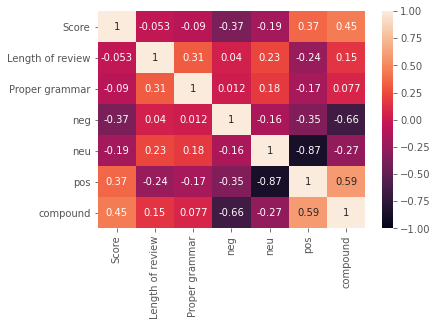

In [39]:
sns.heatmap(df[['Score','Length of review','Proper grammar','neg','neu','pos','compound']].corr(),vmin=-1, vmax=1, annot=True);

In [40]:
for i in range(1,6):
    df[str(i)]=df['Score'].apply(lambda x : x==i)

In [61]:
X=df.iloc[:,-11:-5].astype(int).values
y=df.iloc[:,-5:].astype(int).values

In [50]:
import numpy as np
from sklearn.linear_model import LinearRegression


In [82]:
X=df[['neg','neu','pos','compound']].values

In [88]:
y

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [89]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms

In [90]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [91]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 3 input image channel, 16 output channels, 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(4,16,kernel_size=3,stride=2,padding=1)
        self.conv2 = nn.Conv2d(16, 32,kernel_size=3,stride=2, padding=1)
        self.conv3 = nn.Conv2d(32, 64,kernel_size=3,stride=2, padding=1)
        self.conv4 = nn.Conv2d(64, 64,kernel_size=3,stride=2, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout2d(0.4)
        self.batchnorm1 = nn.BatchNorm2d(16)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.batchnorm3 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(64*5*5,512 )
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 5)
        
    def forward(self, x):
        x = self.batchnorm1(F.relu(self.conv1(x)))
        x = self.batchnorm2(F.relu(self.conv2(x)))
        x = self.dropout(self.batchnorm2(self.pool(x)))
        x = self.batchnorm3(self.pool(F.relu(self.conv3(x))))
        x = self.dropout(self.conv4(x))
        x = x.view(-1, 64*5*5) # Flatten layer
        x = self.dropout(self.fc1(x))
        x = self.dropout(self.fc2(x))
        x = F.log_softmax(self.fc3(x),dim = 1)
        return x

In [93]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [94]:
def accuracy(out, labels):
    _,pred = torch.max(out, dim=1)
    return torch.sum(pred==labels).item()

In [101]:
train_loader=[]
for i in range(len(X)%32):
    train_loader.append((X[:i+32],y[:i+32]))

In [102]:
train_loader

[(array([[ 0.078 ,  0.69  ,  0.232 ,  0.9808],
         [ 0.087 ,  0.811 ,  0.103 ,  0.8094],
         [ 0.    ,  1.    ,  0.    ,  0.    ],
         [ 0.    ,  0.726 ,  0.274 ,  0.7003],
         [ 0.037 ,  0.678 ,  0.285 ,  0.897 ],
         [ 0.    ,  0.62  ,  0.38  ,  0.9259],
         [ 0.04  ,  0.675 ,  0.285 ,  0.8893],
         [ 0.311 ,  0.634 ,  0.056 , -0.9283],
         [ 0.    ,  0.602 ,  0.398 ,  0.9531],
         [ 0.08  ,  0.769 ,  0.151 ,  0.9737],
         [ 0.    ,  0.738 ,  0.262 ,  0.9722],
         [ 0.068 ,  0.76  ,  0.171 ,  0.9919],
         [ 0.    ,  0.633 ,  0.367 ,  0.891 ],
         [ 0.    ,  0.714 ,  0.286 ,  0.9125],
         [ 0.273 ,  0.589 ,  0.138 , -0.5748],
         [ 0.    ,  0.824 ,  0.176 ,  0.8625],
         [ 0.    ,  0.808 ,  0.192 ,  0.9559],
         [ 0.022 ,  0.866 ,  0.112 ,  0.8762],
         [ 0.13  ,  0.847 ,  0.023 , -0.8286],
         [ 0.035 ,  0.874 ,  0.091 ,  0.6427],
         [ 0.024 ,  0.754 ,  0.222 ,  0.9112],
         [ 0.

In [103]:
n_epochs = 12
print_every = 10
valid_loss_min = np.Inf
val_loss = []
val_acc = []
train_loss = []
train_acc = []
total_step = len(train_loader)
for epoch in range(1, n_epochs+1):
    running_loss = 0.0
    # scheduler.step(epoch)
    correct = 0
    total=0
    print(f'Epoch {epoch}\n')
    for batch_idx, (data_, target_) in enumerate(train_loader):
        #data_, target_ = data_.to(device), target_.to(device)# on GPU
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(data_)
        loss = criterion(outputs, target_)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        _,pred = torch.max(outputs, dim=1)
        correct += torch.sum(pred==target_).item()
        total += target_.size(0)
        if (batch_idx) % 20 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, n_epochs, batch_idx, total_step, loss.item()))
    train_acc.append(100 * correct / total)
    train_loss.append(running_loss/total_step)
    print(f'\ntrain loss: {np.mean(train_loss):.4f}, train acc: {(100 * correct / total):.4f}')
    batch_loss = 0
    total_t=0
    correct_t=0
    with torch.no_grad():
        model.eval()
        for data_t, target_t in (validation_loader):
            #data_t, target_t = data_t.to(device), target_t.to(device)# on GPU
            outputs_t = model(data_t)
            loss_t = criterion(outputs_t, target_t)
            batch_loss += loss_t.item()
            _,pred_t = torch.max(outputs_t, dim=1)
            correct_t += torch.sum(pred_t==target_t).item()
            total_t += target_t.size(0)
        val_acc.append(100 * correct_t / total_t)
        val_loss.append(batch_loss/len(validation_loader))
        network_learned = batch_loss < valid_loss_min
        print(f'validation loss: {np.mean(val_loss):.4f}, validation acc: {(100 * correct_t / total_t):.4f}\n')
        # Saving the best weight 
        if network_learned:
            valid_loss_min = batch_loss
            torch.save(model.state_dict(), 'model_classification_tutorial.pt')
            print('Detected network improvement, saving current model')
    model.train()

Epoch 1



TypeError: conv2d() received an invalid combination of arguments - got (numpy.ndarray, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: ([31;1mnumpy.ndarray[0m, [31;1mParameter[0m, [31;1mParameter[0m, [31;1mtuple[0m, [31;1mtuple[0m, [31;1mtuple[0m, [32;1mint[0m)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: ([31;1mnumpy.ndarray[0m, [31;1mParameter[0m, [31;1mParameter[0m, [31;1mtuple[0m, [31;1mtuple[0m, [31;1mtuple[0m, [32;1mint[0m)


In [41]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

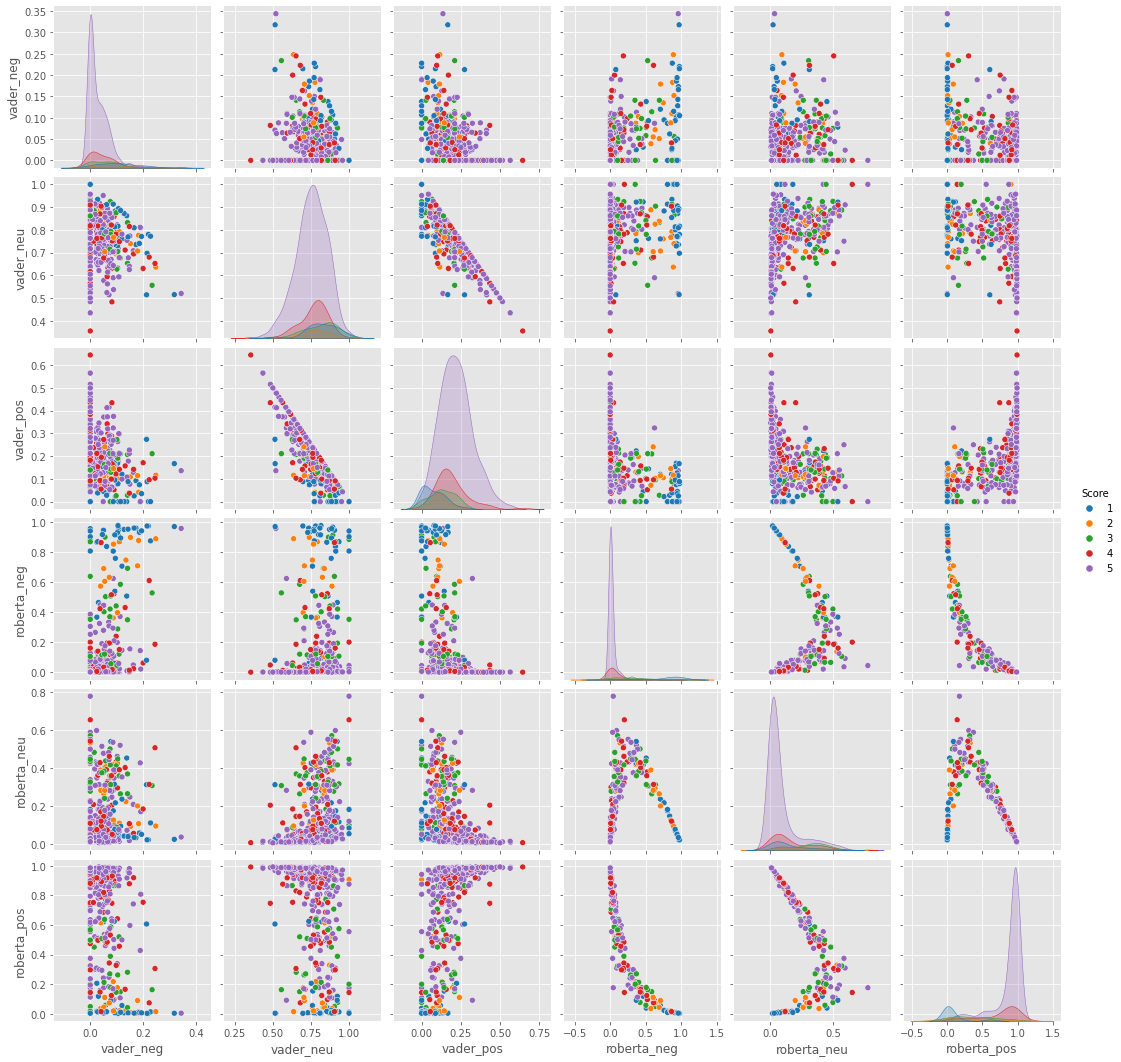

In [42]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [43]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [47]:
df.query('Score>=5')

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
...,...,...,...,...,...,...,...,...,...,...
493,494,B000G6RYNE,A3N9DN0V2YXAXA,musicalcharge,0,0,5,1203638400,You have to love sea salt and vinegar already,"But if you happen to, like me, there is no bet..."
494,495,B000G6RYNE,A2C5BWOM7329UD,Jason T. Stevens,0,0,5,1203465600,Addictive,These are the best potato chips I've ever tast...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...


In [50]:
results_df.query('Score == 1').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'I so wish I would have read this review before purchasing TWO gallons of this oil for my health issues. It reeks like a chemical rubber smell. This smell is coming from the black rubber gasket in the lid. When I called to report the situation to the company, Sabrina told me I would have to pay to send them a sample to have tested by a lab. Unbelievable. Good customer service would indicate that they would pay for the product to be returned and give me a full refund, including shipping. The product is faulty. Period. I will never order anything from this company again and do not recommend it to anyone based on this horrible customer service and lack of responsibility and ownership.'

In [51]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [59]:
sent_pipeline('You are a dummy')


[{'label': 'NEGATIVE', 'score': 0.9981774091720581}]